<a href="https://colab.research.google.com/github/zia207/Python_for_Beginners/blob/main/Notebook/01_04_03_correlation_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 4.3 Correlation Analysis

This tutorial provides a comprehensive introduction to correlation analysis using Python. Correlation analysis is a fundamental statistical technique used to assess the strength and direction of the relationship between two or more variables. It is widely applied in fields such as social sciences, finance, healthcare, and environmental studies. By the end of this tutorial, you will understand how to perform correlation analysis in Python, enabling you to explore relationships within datasets and derive meaningful insights.

## Introduction

Correlation is a statistical method that measures the degree of association between two continuous variables, focusing on their linear relationship. The correlation coefficient ranges from -1 to +1:
- **+1**: Perfect positive linear relationship.
- **-1**: Perfect negative linear relationship.
- **0**: No linear relationship.

The most common correlation coefficient is the **Pearson correlation coefficient** (denoted by \( r \)), calculated as:

$$
r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

Where:
- $r$: Pearson correlation coefficient.
- $X_i, Y_i$: Individual data points for the two variables.
- $\bar{X}, \bar{Y}$: Means of the respective variables.
- $n$: Number of data points.

This formula computes the covariance of the two variables divided by the product of their standard deviations. Correlation coefficients near 1 or -1 indicate a strong linear relationship, while those near 0 suggest a weak or no linear relationship.

**Important**: Correlation does not imply causation. A correlation between two variables does not mean one causes the other, as other factors may influence the relationship. Exercise caution when interpreting results to avoid causal inferences.

### Prerequisites

Install the required packages:

In [ ]:
import importlib.util
import sys

# List of required packages
packages = ['pandas', 'scipy', 'matplotlib','seaborn']

# Check and install missing packages
for package in packages:
    if not importlib.util.find_spec(package):
        try:
            import pip
            pip.main(['install', package])
        except ImportError:
            print(f"Failed to install {package}. Pip is not available.")

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Verify package availability
for package in packages:
    print(f"{package} installed: {bool(importlib.util.find_spec(package))}")

pandas installed: True
scipy installed: True
matplotlib installed: True


## Correlation Analysis from Scratch

Below is Python code to perform correlation analysis and calculate the p-value manually using NumPy and SciPy:

In [ ]:
import numpy as np
from scipy import stats

# Define the two variables
x = np.array([2.1, 2.5, 4.0, 3.6])
y = np.array([8, 10, 12, 14])

# Step 1: Calculate means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Step 2: Calculate the numerator (covariance)
numerator = np.sum((x - mean_x) * (y - mean_y))

# Step 3: Calculate the denominator (product of standard deviations)
denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

# Step 4: Calculate Pearson correlation coefficient
r = numerator / denominator

# Step 5: Calculate the t-statistic
n = len(x)  # Number of data points
t_stat = r * np.sqrt((n - 2) / (1 - r**2))

# Step 6: Calculate the p-value (two-tailed test)
df = n - 2  # Degrees of freedom
p_value = 2 * stats.t.cdf(-abs(t_stat), df)

# Output results
print(f"Correlation coefficient (r): {r:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Correlation coefficient (r): 0.8642
t-statistic: 2.4293
p-value: 0.1358


## Correlation Analysis with Python

Python, with libraries like NumPy, Pandas, and SciPy, makes correlation analysis straightforward. This tutorial covers:
1. **Correlation Computation**: Calculate correlation coefficients using Pandas’ `corr()` method.
2. **Correlation Test**: Test the significance of correlation coefficients using SciPy’s `pearsonr`, `spearmanr`, or `kendalltau`.
3. **Visualizing Correlation**: Use heatmaps and scatter plots with libraries like Seaborn and Matplotlib for intuitive visualization.

## Data

We will use a sample dataset (`gp_soil_data.csv`) containing variables like Soil Organic Carbon (SOC), NDVI, and others. You can download it from a public source or use a similar dataset.

In [ ]:
import pandas as pd

# Load the dataset
url = "https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/gp_soil_data.csv"
mf = pd.read_csv(url)

## Pearson Correlation

The Pearson correlation measures the strength and direction of the linear relationship between two continuous variables. Use Pandas’ `corr()` method with `method='pearson'`:

In [ ]:
# Calculate Pearson correlation between SOC and NDVI
correlation = mf[['SOC', 'NDVI']].corr(method='pearson')
print(correlation)

## Nonparametric Correlations

Nonparametric correlations, such as **Spearman’s rank** and **Kendall’s tau**, are ideal for non-normal data or non-linear relationships.

### Spearman's Rank Correlation

Spearman’s rank correlation measures the strength and direction of monotonic relationships based on ranks:

$$
\rho = 1 - \frac{6\sum d_i^2}{n(n^2 - 1)}
$$

Where:
- $\rho$: Spearman’s correlation coefficient.
- $d_i$: Difference between ranks of corresponding pairs.
- $n$: Number of observations.

Calculate it using:

In [ ]:
# Calculate Spearman's rank correlation
spearman_corr = mf[['SOC', 'NDVI']].corr(method='spearman')
print(spearman_corr)

           SOC      NDVI
SOC   1.000000  0.648452
NDVI  0.648452  1.000000


**Note**: An **ordinal scale** categorizes data into ordered categories (e.g., low, medium, high) without equal intervals. A **nominal scale** categorizes data without order (e.g., colors).

### Kendall's Tau Correlation

Kendall’s tau measures the strength of monotonic relationships based on concordant and discordant pairs:

$$
\tau = \frac{\text{Number of concordant pairs} - \text{Number of discordant pairs}}{\frac{1}{2} n (n - 1)}
$$

Calculate it using:

In [ ]:
# Calculate Kendall's tau correlation
kendall_corr = mf[['SOC', 'NDVI']].corr(method='kendall')
print(kendall_corr)

           SOC      NDVI
SOC   1.000000  0.461681
NDVI  0.461681  1.000000


**Note**: **Concordant pairs** have the same rank order in both variables; **discordant pairs** have different orders.

## Correlation Test

Use SciPy’s `pearsonr` to test the significance of the Pearson correlation coefficient:

In [ ]:
from scipy.stats import pearsonr

# Perform correlation test
corr, p_value = pearsonr(mf['SOC'], mf['NDVI'])
print(f"Correlation coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4e}")

Correlation coefficient: 0.5870
p-value: 1.3549e-44


A p-value < 0.05 indicates a significant correlation at the 5% significance level.

## Correlation by Group

Calculate Spearman’s correlation by group (e.g., land cover type, `NLCD`):

In [ ]:
# Group by NLCD and calculate Spearman correlation
corr_by_group = mf.groupby('NLCD')[['SOC', 'NDVI']].corr(method='spearman').iloc[0::2,-1]
print(corr_by_group)

NLCD                   
Forest              SOC    0.405355
Herbaceous          SOC    0.535335
Planted/Cultivated  SOC    0.480317
Shrubland           SOC    0.577388
Name: NDVI, dtype: float64


## Scatter Plot

Scatter plots visualize relationships between two continuous variables.

### Basic Scatter Plot

Using Matplotlib:

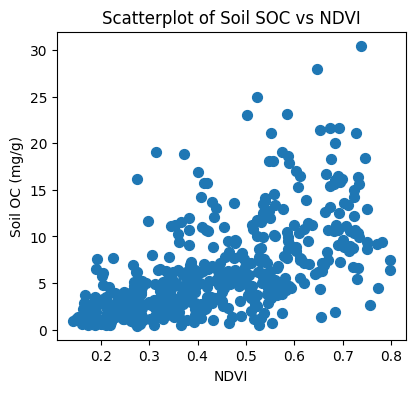

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.5, 4))
plt.scatter(mf['NDVI'], mf['SOC'], s=50)
plt.xlabel('NDVI')
plt.ylabel('Soil OC (mg/g)')
plt.title('Scatterplot of Soil SOC vs NDVI')
plt.show()

### Scatter Plot with Seaborn

Using Seaborn for enhanced styling:

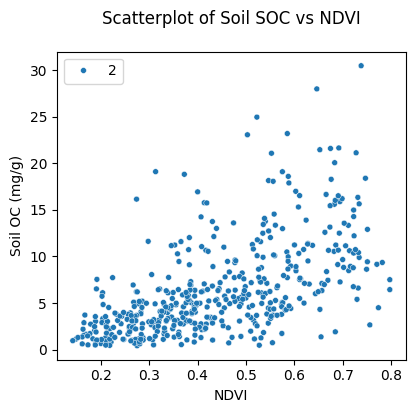

In [ ]:
import seaborn as sns

plt.figure(figsize=(4.5, 4))
sns.scatterplot(data=mf, x='NDVI', y='SOC', size=2)
plt.title('Scatterplot of Soil SOC vs NDVI', pad=20)
plt.xlabel('NDVI')
plt.ylabel('Soil OC (mg/g)')
plt.show()

### Scatter Plot by Group

Color-code points by `NLCD`:

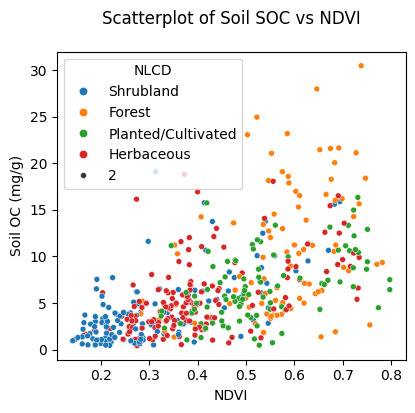

In [ ]:
plt.figure(figsize=(4.5, 4))
sns.scatterplot(data=mf, x='NDVI', y='SOC', hue='NLCD', size=2)
plt.title('Scatterplot of Soil SOC vs NDVI', pad=20)
plt.xlabel('NDVI')
plt.ylabel('Soil OC (mg/g)')
plt.legend(title='NLCD')
plt.show()

## Bubble Plot

Bubble plots visualize three variables, with bubble size representing a third variable (e.g., `MAT`):

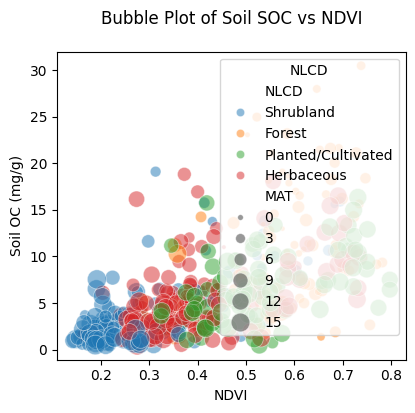

In [ ]:
plt.figure(figsize=(4.5, 4))
sns.scatterplot(data=mf, x='NDVI', y='SOC', size='MAT', hue='NLCD', alpha=0.5, sizes=(10, 200))
plt.title('Bubble Plot of Soil SOC vs NDVI', pad=20)
plt.xlabel('NDVI')
plt.ylabel('Soil OC (mg/g)')
plt.legend(title='NLCD')
plt.show()

## Marginal Plot

Marginal plots display the distribution of variables along the margins of a scatter plot. Use Seaborn’s `jointplot`:

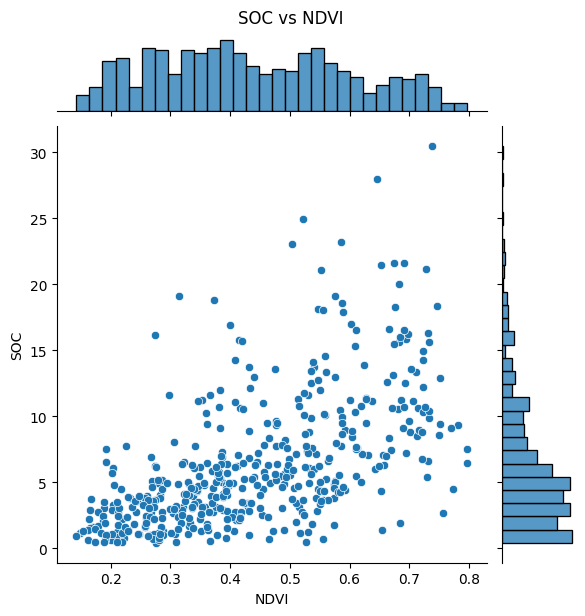

In [ ]:
sns.jointplot(data=mf, x='NDVI', y='SOC', kind='scatter', marginal_kws=dict(bins=30, fill=True))
plt.suptitle('SOC vs NDVI', y=1.02)
plt.show()

For histograms, density plots, or boxplots along margins:

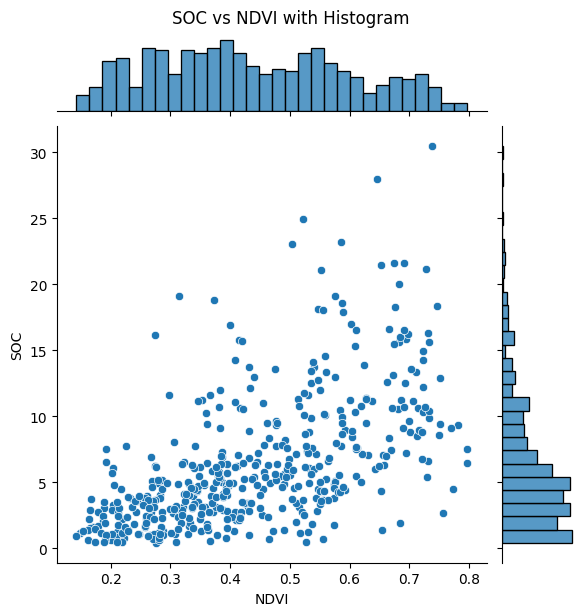

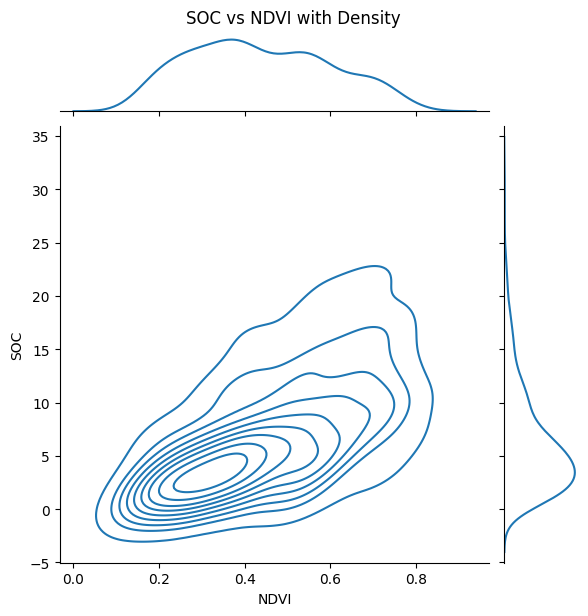

In [ ]:
# Histogram marginal
sns.jointplot(data=mf, x='NDVI', y='SOC', kind='scatter', marginal_kws=dict(bins=30, fill=True))
plt.suptitle('SOC vs NDVI with Histogram', y=1.02)
plt.show()

# Density marginal
sns.jointplot(data=mf, x='NDVI', y='SOC', kind='kde')
plt.suptitle('SOC vs NDVI with Density', y=1.02)
plt.show()

## Correlation Matrix

A correlation matrix displays correlation coefficients for multiple variables.

In [ ]:
# Select variables for correlation matrix
df_cor = mf[['SOC', 'DEM', 'Slope', 'TPI', 'NDVI', 'MAP', 'MAT']]

# Compute correlation matrix
cor_mat = df_cor.corr(method='pearson')
print(cor_mat)

            SOC       DEM     Slope       TPI      NDVI       MAP       MAT
SOC    1.000000  0.166689  0.404801  0.041190  0.587045  0.498862 -0.358026
DEM    0.166689  1.000000  0.703387 -0.002564 -0.068318 -0.307999 -0.807737
Slope  0.404801  0.703387  1.000000 -0.012115  0.311415  0.146040 -0.638476
TPI    0.041190 -0.002564 -0.012115  1.000000  0.072021  0.144677  0.004735
NDVI   0.587045 -0.068318  0.311415  0.072021  1.000000  0.803982 -0.210115
MAP    0.498862 -0.307999  0.146040  0.144677  0.803982  1.000000  0.060450
MAT   -0.358026 -0.807737 -0.638476  0.004735 -0.210115  0.060450  1.000000


### Correlation Matrix with P-values

To include p-values, use a custom function:

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

def cor_with_pvalues(df):
    cols = df.columns
    n = len(cols)
    r_matrix = np.zeros((n, n))
    p_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                r_matrix[i, j] = 1.0
                p_matrix[i, j] = 0.0
            else:
                r, p = pearsonr(df[cols[i]], df[cols[j]])
                r_matrix[i, j] = r
                p_matrix[i, j] = p

    r_df = pd.DataFrame(r_matrix, index=cols, columns=cols)
    p_df = pd.DataFrame(p_matrix, index=cols, columns=cols)
    return r_df, p_df

# Compute correlation and p-value matrices
cor_mat, p_mat = cor_with_pvalues(df_cor)
print("Correlation Matrix:\n", cor_mat)
print("P-value Matrix:\n", p_mat)

Correlation Matrix:
             SOC       DEM     Slope       TPI      NDVI       MAP       MAT
SOC    1.000000  0.166689  0.404801  0.041190  0.587045  0.498862 -0.358026
DEM    0.166689  1.000000  0.703387 -0.002564 -0.068318 -0.307999 -0.807737
Slope  0.404801  0.703387  1.000000 -0.012115  0.311415  0.146040 -0.638476
TPI    0.041190 -0.002564 -0.012115  1.000000  0.072021  0.144677  0.004735
NDVI   0.587045 -0.068318  0.311415  0.072021  1.000000  0.803982 -0.210115
MAP    0.498862 -0.307999  0.146040  0.144677  0.803982  1.000000  0.060450
MAT   -0.358026 -0.807737 -0.638476  0.004735 -0.210115  0.060450  1.000000
P-value Matrix:
                 SOC            DEM         Slope       TPI           NDVI  \
SOC    0.000000e+00   2.970273e-04  7.683399e-20  0.374481   1.354886e-44   
DEM    2.970273e-04   0.000000e+00  6.086576e-71  0.955939   1.404476e-01   
Slope  7.683399e-20   6.086576e-71  0.000000e+00  0.793998   5.836002e-12   
TPI    3.744812e-01   9.559392e-01  7.939980e-

### Visualizing Correlation Matrix

Use Seaborn’s `heatmap` to visualize the correlation matrix:

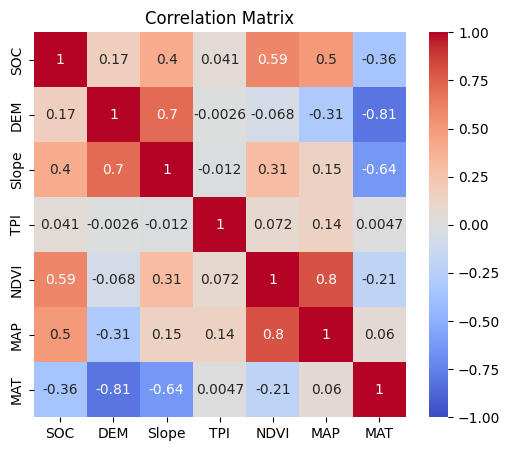

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

Insignificant correlations (p > 0.05) can be masked:

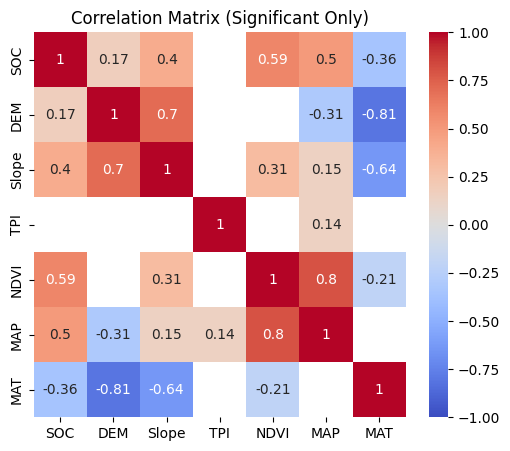

In [ ]:
mask = p_mat > 0.05
plt.figure(figsize=(6, 5))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, mask=mask)
plt.title('Correlation Matrix (Significant Only)')
plt.show()

## Pairs Plot

Seaborn’s `pairplot` creates a grid of scatter plots for pairwise comparisons:

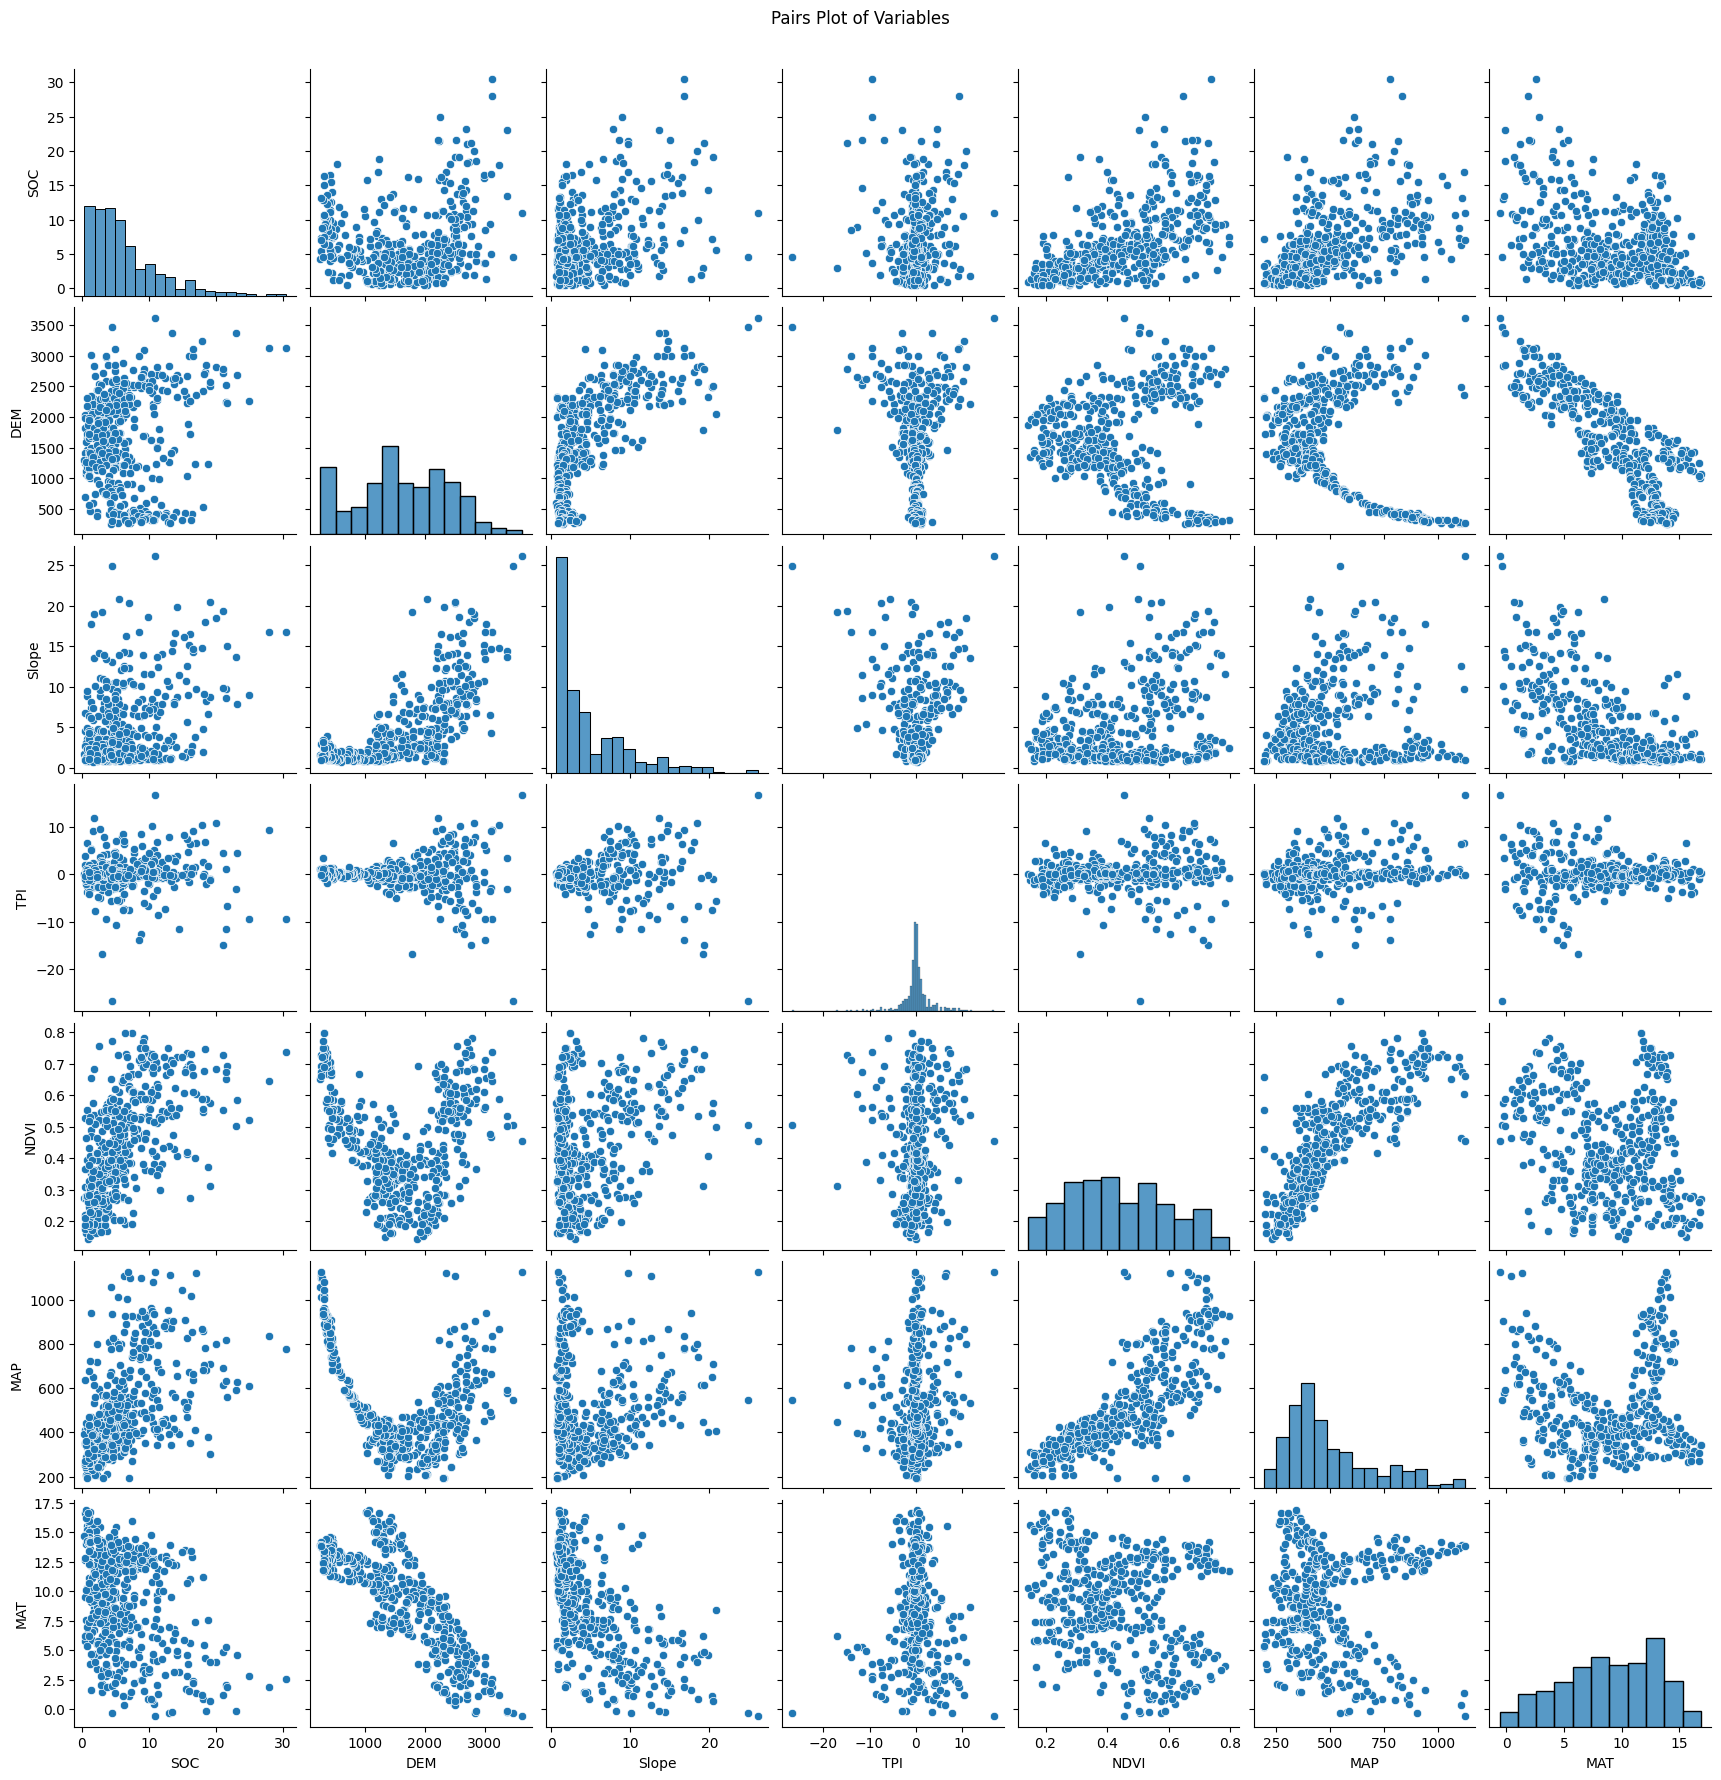

In [ ]:
sns.pairplot(df_cor)
plt.suptitle('Pairs Plot of Variables', y=1.02)
plt.show()

## Summary and Conclusion

This tutorial has provided a foundation for conducting correlation analysis in Python. You can now compute correlation coefficients, test their significance, and visualize relationships using scatter plots, bubble plots, marginal plots, and correlation matrices. These skills enable you to explore datasets and build a foundation for more advanced statistical techniques.

## Resources

1. [Correlation Analysis in Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)
2. [Seaborn Correlation Matrix](https://seaborn.pydata.org/examples/heatmap_annotation.html)
3. [SciPy Statistical Functions](https://docs.scipy.org/doc/scipy/reference/stats.html)
4. [Pandas Correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)